# Another explanation about PCA


<img src = './images/pca.jpeg' width="width" height="height"/>
<sub>photo credit: Raunak Joshi</sub>


In this lab, we are going to view another explanation about Principal Component Analysis(PCA). PCA is a statistical technique invented in 1901 by Karl Pearson that uses orthogonal transformations to map a set of variables into a set of linearly uncorrelated variables called Principal Components. 

PCA is based on the Singular Value Decomposition (SVD) of the Covariance Matrix of the original dataset. The Eigenvectors of such decomposition are used as a rotation matrix.  The Eigenvectors are arranged in the rotation matrix in decreasing order according to its explained variance. This last term is related to the EigenValues of the SVD.

PCA is a potent technique with applications ranging from simple space transformation, dimensionality reduction, and mixture separation from spectral information.

Follow this lab to view another explanation for PCA. In this case, we are going to use the concept of rotation matrices applied to correlated random data, just as illustrated in the next picture.

<img src=./images/GaussianScatterPCA.svg>

Source: https://en.wikipedia.org/wiki/Principal_component_analysis

As usual, we must import the libraries that will use in this lab.

In [1]:
import numpy as np                         # Linear algebra library
import matplotlib.pyplot as plt            # library for visualization
from sklearn.decomposition import PCA      # PCA library
import pandas as pd                        # Data frame library
import math                                # Library for math functions
import random                              # Library for pseudo random numbers

To start, let us consider a pair of random variables x, y. Consider the base case when y = n * x. The x and y variables will be perfectly correlated to each other since y is just a scaling of x.

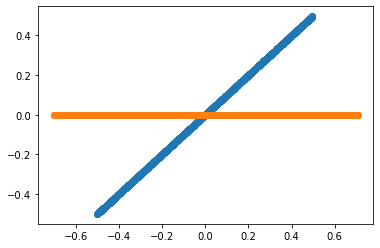

In [2]:
np.random.seed(1)
n = 1  # The amount of the correlation
x = np.random.uniform(1,2,1000) # Generate 1000 samples from a uniform random variable
y = x.copy() * n # Make y = n * x

# PCA works better if the data is centered
x = x - np.mean(x) # Center x. Remove its mean
y = y - np.mean(y) # Center y. Remove its mean

data = pd.DataFrame({'x': x, 'y': y}) # Create a data frame with x and y
plt.scatter(data.x, data.y) # Plot the original correlated data in blue

pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally, it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data) # Transform the data base on the rotation matrix of pcaTr
# # Create a data frame with the new variables. We call these new variables PC1 and PC2
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2']) 

# Plot the transformed data in orange
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

In [7]:
rotatedData.shape
rotatedData[:5]

array([[ 1.18203639e-01,  1.81288383e-18],
       [-3.10730854e-01,  1.19090712e-17],
       [ 7.07800064e-01, -2.03946937e-17],
       [ 2.80398989e-01, -1.13204640e-17],
       [ 5.00417643e-01,  1.32352960e-17]])

In [8]:
dataPCA.head(10)

,PC1,PC2
0,0.118204,1.812884e-18
1,-0.310731,1.190907e-17
2,0.707800,-2.039469e-17
3,0.280399,-1.132046e-17
4,0.500418,1.323530e-17
5,0.577375,1.312209e-17
6,0.444550,5.640476e-19
7,0.219265,-4.687675e-18
8,0.146848,-4.995834e-18
9,-0.054040,-8.604416e-19


## Understanding the transformation model pcaTr

As mentioned before, a PCA model is composed of a rotation matrix and its corresponding explained variance. In the next module, we will explain the details of the rotation matrices. 

* `pcaTr.components_` has the rotation matrix 
* `pcaTr.explained_variance_` has the explained variance of each principal component

In [9]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)


Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues or explained variance
[1.66465230e-01 2.08930963e-34]


$cos(45^o) = 0.7071$

The rotation matrix is equal to:

$$R = \begin{bmatrix} cos(45^o) & sin(45^o) \\ -sin(45^o) & cos(45^o) \end{bmatrix}$$ 

And $45^o$ is the same angle that form the variables y = 1 * x.

Then, PCA has identified the angle in which point the original variables.

And the explained Variance is around [0.166 0]. Remember that the Variance of a uniform random variable x ~ U(1, 2), as our x and y, is equal to:

$$Var(x) = \frac {(2 - 1)^2}{12} = 0.083333$$
    
Then the explained variance given by the PCA can be interpret as

$$[Var(x) + Var(y),  \ 0] = [0.0833 + 0.0833, \ 0] = [0.166, \ 0]$$

Which means that all the explained variance of our new system is explained by our first principal component. 


## Correlated Normal Random Variables.

Now, we will use a controlled dataset composed of 2 random variables with different variances and with a specific Covariance among them. The only way I know to get such a dataset is, first, create two independent Normal random variables with the desired variances and then combine them using a rotation matrix. In this way, the new resulting variables will be a linear combination of the original random variables and thus be dependent and correlated.